# Determinação de Classes de Objetos Astronômicos 

# Introdução

**Sloan Digital Sky Survey - DR18**

Neste projeto de Machine Learning classificaremos as observações do Data Release (DR) 18 do Sloan Digital Sky Survey (SDSS). <br>
Cada observação é descrita por 42 características e 1 coluna *classe* que identifica a observação como:
* estrela
* galáxia
* QSO (Quasi-Stellar Object) ou um Quasar.



## Etapa 1 - Pacotes necessários

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier, plot_importance

import operator

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\MVA\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Etapa 2 - Carregando dados

In [2]:
# Carga do arquivo
df = pd.read_csv('SDSS_DR18.csv')

In [3]:
#Prepara os grids para apresentar todas colunas, quando solicitidao
pd.options.display.max_columns = df.shape[1]

In [4]:
# remover colunas desnecessárias, como ID dos registros e identificadores dos instrumentos
df = df.drop(['objid', 'specobjid', 'ra', 'dec', 'camcol', 'run', 'rerun', 'field', 'plate', 'mjd', 'fiberid'], axis=1)
df.head()


,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# Visualização dos dados

In [5]:
# Visão de uma amostra das primeiras linhas
pd.set_option('display.max_columns', None)
df.head()

,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [6]:
# Número de linhas e colunas
df.shape

(100000, 32)

Verificando valores nulos

In [7]:
nulos = df.isnull().sum().max()
nulos 

0

Não há valores nulos ou ausentes



# Sumário dos tipos de dados e outras informações

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   petroRad_u   100000 non-null  float64
 6   petroRad_g   100000 non-null  float64
 7   petroRad_i   100000 non-null  float64
 8   petroRad_r   100000 non-null  float64
 9   petroRad_z   100000 non-null  float64
 10  petroFlux_u  100000 non-null  float64
 11  petroFlux_g  100000 non-null  float64
 12  petroFlux_i  100000 non-null  float64
 13  petroFlux_r  100000 non-null  float64
 14  petroFlux_z  100000 non-null  float64
 15  petroR50_u   100000 non-null  float64
 16  petroR50_g   100000 non-null  float64
 17  petroR50_i   100000 non-null  float64
 18  petroR50_r   100000 non-n


# Apresentação de alguns dados estatísticos

In [9]:

df.describe()

,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.641137,17.407088,16.878550,16.517137,16.154837,6.497004,4.678636,4.458623,4.478506,4.560777,52.988780,175.000342,397.383205,302.745181,471.129084,-3.683850,1.111468,-1.741663,1.123442,-8.957856,19.592174,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,0.829035,0.974683,1.118858,31.694636,54.871034,13.134345,5.080707,5.189891,4.922520,5.692894,136.851904,357.402958,879.192500,645.886531,1123.432784,242.870050,100.026659,192.347301,94.895979,328.489488,1.320291,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,0.031018,0.072805,0.057369,0.503416,0.045731,-9306.297000,-396.729600,-489.092700,-19.912980,-75768.980000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,13.253570,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,18.214315,16.853340,16.194763,15.861995,15.620268,1.580248,1.483575,1.301338,1.350223,1.335289,19.424303,58.397385,113.048875,90.606687,121.916650,0.782614,0.743202,0.663752,0.687324,0.674866,18.751895,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,18.878005,17.520310,16.896065,16.594740,16.419040,3.473864,3.336594,3.349003,3.291405,3.541550,27.950255,93.950580,214.238300,164.623100,243.603200,1.468786,1.546289,1.497291,1.537168,1.469153,19.560930,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,19.275750,18.052460,17.565593,17.310102,17.193873,7.470103,6.570969,6.196268,6.325418,6.098101,50.844825,173.442500,415.916475,310.852750,498.303575,3.088440,2.978893,2.769644,2.855537,2.598539,20.660875,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,19.599990,19.977270,31.698160,30.980870,28.668700,258.518600,258.409800,258.453600,258.436700,258.422600,17173.480000,21686.390000,40899.660000,31533.950000,54495.910000,177.371300,75.968280,139.884000,123.567700,74.485400,26.369840,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


Apresentação dos nomes de colunas

In [10]:
df.columns.values

array(['u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g', 'petroRad_i',
       'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g',
       'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u',
       'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u',
       'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype=object)

# **Coluna Target**

Avaliando a distribuição da coluna target

In [11]:
class_counts = df['class'].value_counts()

# cálculo das porcentagens
class_percentages = (class_counts / class_counts.sum()) * 100

# Cria um novo dataframe para apresentar a distribuição
result_df = pd.DataFrame({'Total': class_counts, '%': class_percentages})
result_df


,Total,%
GALAXY,52343,52.343
STAR,37232,37.232
QSO,10425,10.425


Apresentando graficamente

Text(0.5, 1.0, 'Categorias de classes')

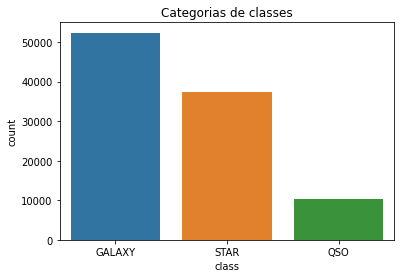

In [12]:
sns.countplot(x = df['class'])
plt.title('Categorias de classes')

# Etapa 3 - Preparação dos Dados

Vamos aplicar o LabelEncoder para transformar os valores de classe em dados numéricos, para que possam ser utilizado nos modelos

In [13]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [14]:
df['class'].value_counts()

0    52343
2    37232
1    10425
Name: class, dtype: int64

# Etapa 4 - Processamento dos dados

Preparo dos datasets para aplicação dos modelos

In [15]:
X = df.drop('class', axis=1)
y = df['class']
X_columns = X.columns

In [16]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 31), (30000, 31), (70000,), (30000,))

# Etapa 5 - Aplicação dos Modelos

Serão aplicados os seguintes modelos:
* Logistic Regression
* Decision Tree
* Support Vector Machines (SVM)
* Naive Bayes
* KNN Neighbours
* XGBoost

In [19]:
# Dicionário para armazenar a acurácia dos modelos
acuracias = {}

**5.1. Logistic Regression**

In [20]:
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)
acc = model_lr.score(X_test,y_test)*100

acuracias['Logistic Regression'] = acc
print("Acurácia Logistic Regression: {:.2f}%".format(acc))

Acurácia Logistic Regression: 98.33%


**5.2 Decision Tree**

In [21]:
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)

acc = model_dtc.score(X_test, y_test)*100
acuracias['Decision Tree'] = acc
print("Acurácia Decision Tree: {:.2f}%".format(acc))

Acurácia Decision Tree: 98.53%


**5.3 Support Vector Machines (SVM)**

In [22]:
model_svm = SVC(random_state = 42)
model_svm.fit(X_train, y_train)

acc = model_svm.score(X_test,y_test)*100
acuracias['SVM'] = acc
print("Acurácia SVM: {:.2f}%".format(acc))

Acurácia SVM: 98.56%


**5.4 Naive Bayes**

In [23]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

acc = model_nb.score(X_test,y_test)*100
acuracias['Naive Bayes'] = acc
print("Acurácia Naive Bayes: {:.2f}%".format(acc))

Acurácia Naive Bayes: 52.58%


**5.5 KNN Neighbours**

In [24]:
model_knn = KNeighborsClassifier(n_neighbors = 3) 
model_knn.fit(X_train, y_train)

acc = model_knn.score(X_test, y_test)*100
acuracias['KNN'] = acc
print("Acurácia KNN: {:.2f}%".format(acc))

Acurácia KNN: 97.71%


**5.6 XGBoost** 

In [25]:
xgbModel = XGBClassifier(n_estimators=50,          
                         max_depth=4,              
                         learning_rate=0.1,        
                         objective='reg:logistic',
                         random_state=42) 
xgbModel.fit(X_train, y_train)

preds = xgbModel.predict(X_test)

acc = accuracy_score(y_test, preds)*100
acuracias["XGBoost"] = acc 
print("Acurácia XGBoost: {:.2f}%".format(acc))

Acurácia XGBoost: 99.31%


**5.7 Apresentando resultados** 

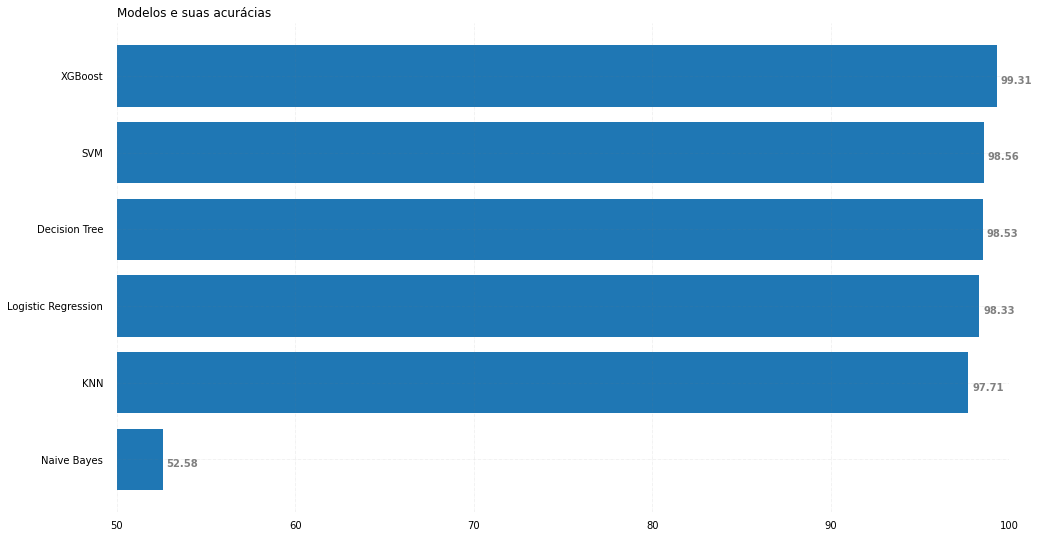

In [26]:
# Ordena os valores do maior para o menor
acuracias_ordenadas = dict(sorted(acuracias.items(), key=operator.itemgetter(1), reverse=True))
 
# Prepara gráfico de barras
fig, ax = plt.subplots(figsize =(16, 9))
ax.set(xlim=[50, 100])
ax.barh(list(acuracias_ordenadas), list(acuracias_ordenadas.values()))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.set_facecolor("white")
 
ax.invert_yaxis()
 
# Acrescenta os valores ao gráfico
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Título 
ax.set_title('Modelos e suas acurácias', loc ='left', )

# Salva a figura para posterior visualização
plt.savefig('acuracias.png', dpi=300)

# Apresenta a figura
plt.show() 

# Etapa 6 - Importância das features com o melhor modelo (XGBoost)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

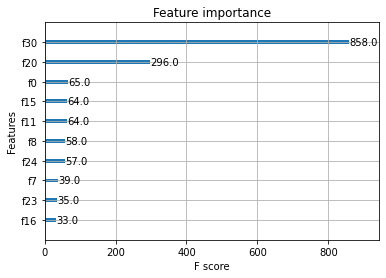

In [27]:
# Apresentando as 10 mais importantes features
plot_importance(xgbModel, max_num_features=10)

Atributos principais:
* redshift
* psfMag_u
* petroFlux_g


# 6.1 - Análise EDA das principais features

In [28]:
num_columns=['redshift', 'psfMag_u', 'petroFlux_g']
df_pf = df[['redshift', 'psfMag_u', 'petroFlux_g', 'class']]

In [29]:
# Apresenta alguns dados estatísticos
df_pf.describe()

,redshift,psfMag_u,petroFlux_g,class
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.168441,19.592174,175.000342,0.848890
std,0.434285,1.320291,357.402958,0.934304
min,-0.004268,13.253570,-396.729600,0.000000
25%,0.000065,18.751895,58.397385,0.000000
50%,0.048772,19.560930,93.950580,0.000000
75%,0.096680,20.660875,173.442500,2.000000
max,6.990327,26.369840,21686.390000,2.000000


In [30]:
# Calcula a média por classe
round(df_pf.groupby("class").mean(), 6)

,redshift,psfMag_u,petroFlux_g
class,,,
0,0.079167,20.569081,168.355278
1,1.218407,19.046810,42.728355
2,-0.000043,18.371482,221.378674


Análises Gráficas

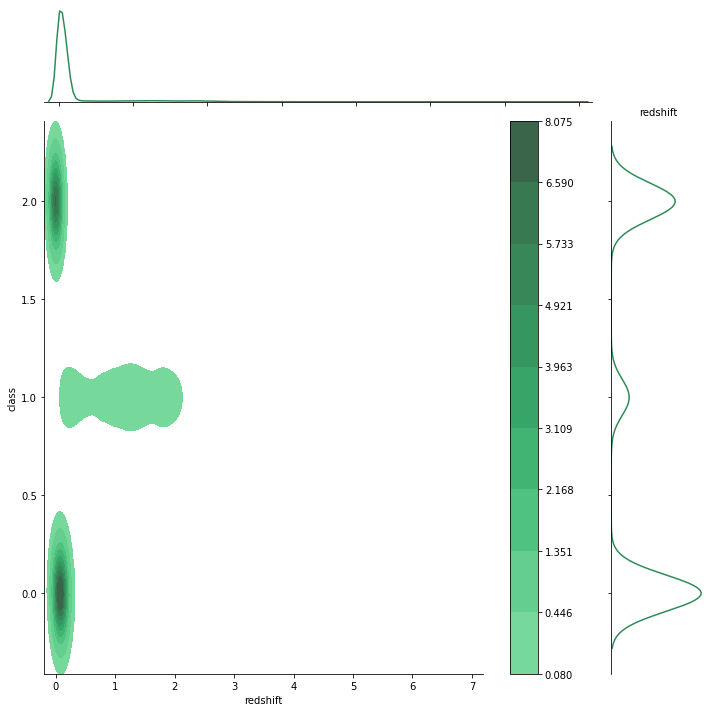

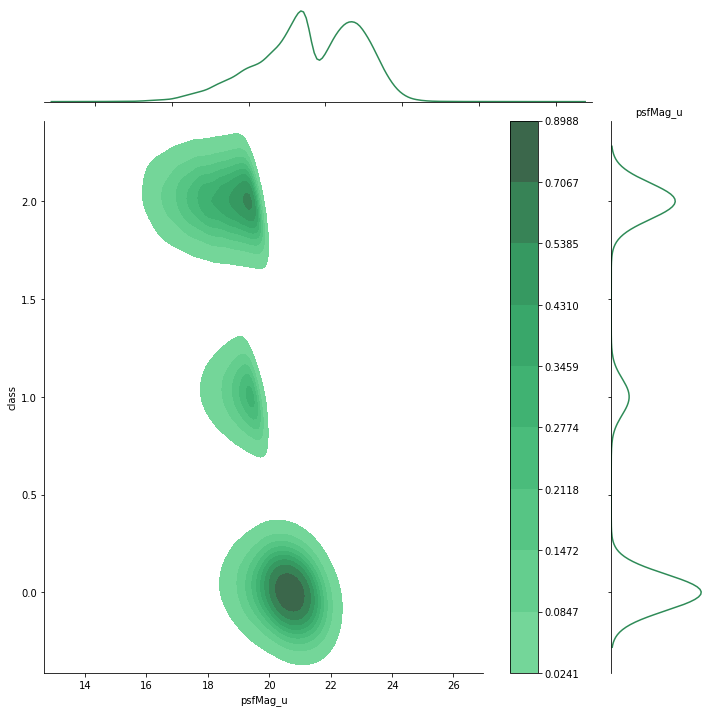

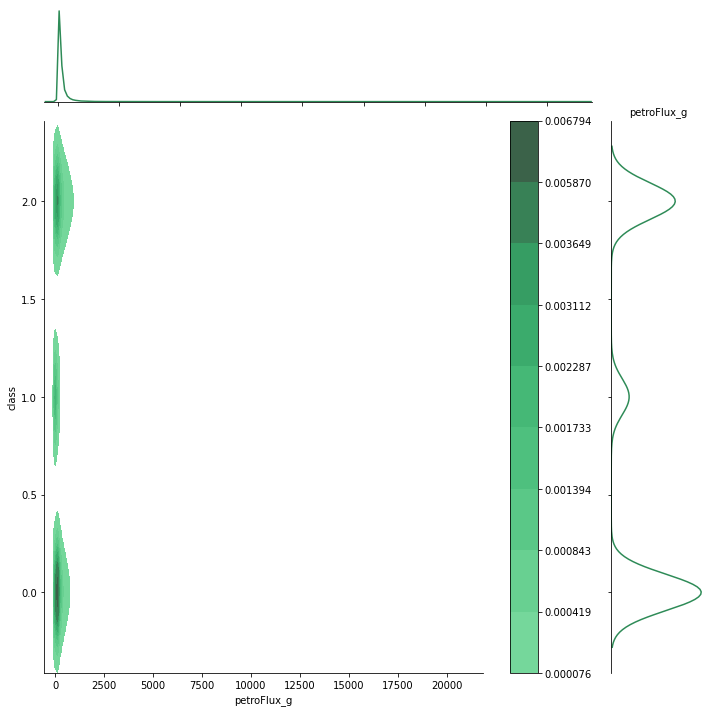

In [31]:

for i,c in enumerate(num_columns):    
    sns.jointplot(x=c, y='class', data=df_pf, kind='kde', palette = "dict", color='seagreen', cbar=True, shade=True, height=10)
    plt.xlabel(c)
    plt.ylabel('class')
    plt.title(c,fontsize=10)

<Figure size 1440x360 with 0 Axes>

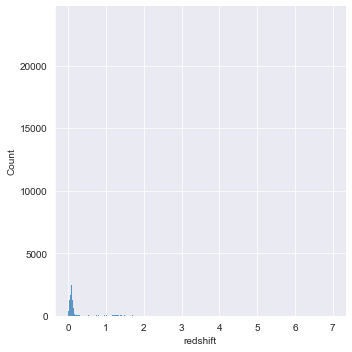

<Figure size 1440x360 with 0 Axes>

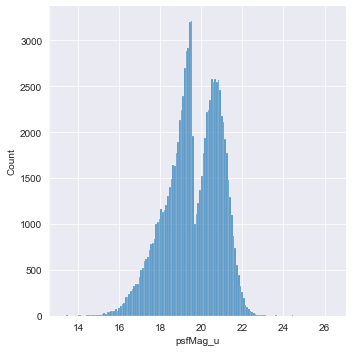

<Figure size 1440x360 with 0 Axes>

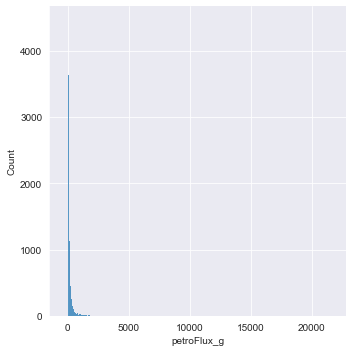

In [32]:
for i,c in enumerate(num_columns):    
    plt.figure(figsize=(20,5))
    sns.set_style('darkgrid')
    sns.displot(df[c])

<Figure size 576x576 with 0 Axes>

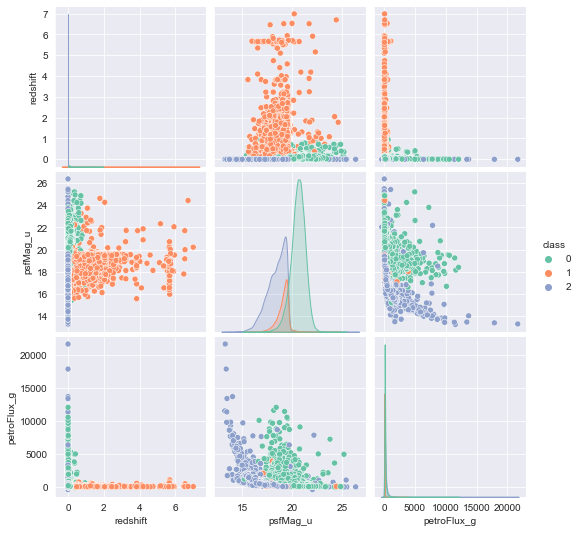

In [33]:
plt.figure(figsize=(8, 8))
sns.pairplot(df_pf, hue='class', palette='Set2')
plt.show()


Analisando os gráficos, vemos uma distinção muito clara entre as classes:

* redshift - de forma geral, quanto maior o redshift, mais distante está o objeto.
* psfMag_u - apresenta a magnitude (brilho) do objeto especificamente na banda u (ultravioleta). As 3 diferentes classe têm valores bastante característicos desse indicador.
* petroFlux_g - semelhante a psfMag, mede o fluxo total recebido pelo objeto. As estrelas, por estarem mais próximas, possuem um valor maior. Os quasares, um valor menor
